<a href="https://colab.research.google.com/github/bsaha205/Spring_23_MLO/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

$S_α(\mathbf{x_0}) = argmin_{x \in R^d}\frac{1}{2α} \|\mathbf{x} - \mathbf{x_0}\|^2 + \|x\|_1$

To show that the soft-shrinkage operator on vectors given by $S_α(x_0)$ is well defined, we need to show that the objective function is strictly convex.
Now, the first term is a strictly convex function as it's hessian metrix is positive definite. And the second term is also convex since the L1-norm n is convex. Therefore, the sum of the two terms is stricly convex function that means the objective function is well difined and there is a unique minimizer.


Now, from the participation 4 for a scalar input a, we have,

$s_α(a) = \begin{cases}
a - \alpha, & \text{if } a > \alpha \\
0, & \text{if } -\alpha \leq a \leq \alpha \\
a + \alpha, & \text{if } a < -\alpha
\end{cases}$


Now we have,

$S_α(\mathbf{x_0}) = argmin_{x \in R^d}\frac{1}{2α} \|\mathbf{x} - \mathbf{x_0}\|^2 + \|x\|_1 $

$S_α(\mathbf{x_0}) = argmin_{x \in R^d}\frac{1}{2α} \sum_{i=1}^d (x_i - (x_0)_i)^2 + \sum_{i=1}^d |x_i| $

$S_α(\mathbf{x_0}) = argmin_{x \in R^d} \sum_{i=1}^d \frac{1}{2α}[(x_i - (x_0)_i)^2 + |x_i|] $ 

Now after seperating the individual component we can write,

$S_α(\mathbf{x_0})_i  = s_α((\mathbf{x_0})_i)$ 

After simplyfying $s_α((\mathbf{x_0})_i)$  we can write,

$ s_α((\mathbf{x_0})_i) = sign((\mathbf{x_0})_i) max(|(\mathbf{x_0})_i| -α, 0)$



The implementation of **softShrink(x0, alpha)** is given below.

In [1]:
import numpy as np

def softShrink(x0, alpha):
    return np.sign(x0) * np.maximum(np.abs(x0) - alpha, 0)

# Problem 2

We have the (Prox) as,

$\mathbf{x}_{t+1} = argmin_{x \in R^d}\frac{1}{2α_t} \|\mathbf{x} - (\mathbf{x}_t - α_t\nabla f(\mathbf{x}_t) \|_2^2 + g(\mathbf{x})$

 if $\mathbf{x^*}$ is a fixed point of prox, then we can write $\mathbf{x}_{t+1} = \mathbf{x}_{t} = \mathbf{x^*}$

 As the prox equation becomes,

 $\mathbf{x^*} = argmin_{x \in R^d}\frac{1}{2α_t} \|\mathbf{x} - (\mathbf{x^*} - α_t\nabla f(\mathbf{x^*}) \|_2^2 + g(\mathbf{x})$

 Now since $\mathbf{x^*}$ is a soultion, from Fermat’s optimality condition we can write,

$0 \in ∂ (\frac{1}{2α_t} \|\mathbf{x} - (\mathbf{x^*} - α_t\nabla f(\mathbf{x^*}) \|_2^2) + ∂ (g(\mathbf{x})) \hspace{1in}$ (at $\mathbf{x} = \mathbf{x^*})$

==> $0 \in \frac{1}{α_t} (\mathbf{x^*} - \mathbf{x^*} + α_t\nabla f(\mathbf{x^*})) + ∂ (g(\mathbf{x^*}))$ 

==> $0 \in \nabla f(\mathbf{x^*}) + ∂ (g(\mathbf{x^*}))$ 

This final derivation implies that it is a minimizer of (Comp) which is, $min_{\mathbf{x}} f(\mathbf{x})+ g(\mathbf{x})$

# Problem 3

We have the LASSO problem that is,

$\mathbf{x}^* = argmin_{x \in R^d}\frac{1}{2} \|\mathbf{Ax} - b\|_2^2 + λ\|x\|_1$

Assume, $f(\mathbf{x}) = \frac{1}{2} \|\mathbf{Ax} - b\|_2^2$ and $g(\mathbf{x}) = λ\|x\|_1$,

So we write the above LASSO problem in the form of $min_{\mathbf{x}} f(\mathbf{x})+ g(\mathbf{x})$

Now from the (Prox) of Problem-2 we can write that,

$\mathbf{x}_{t+1} = argmin_{x \in R^d}\frac{1}{2α_t} \|\mathbf{x} - (\mathbf{x}_t - α_t\nabla f(\mathbf{x}_t) \|_2^2 + g(\mathbf{x})$

$\mathbf{x}_{t+1} = argmin_{x \in R^d}\frac{1}{2α_t} \|\mathbf{x} - (\mathbf{x}_t - α_t \mathbf{A}^T (\mathbf{Ax_t} - b)\|_2^2 +  λ\|x\|_1$

$\mathbf{x}_{t+1} = s_{αλ} (\mathbf{x}_t - α_t \mathbf{A}^T (\mathbf{Ax_t} - b))$

Where $s_{αλ}$ is the soft-shrinkage operator and defined as,

$ s_α(\mathbf{y}) = sign(\mathbf{y}) * max(|\mathbf{y}| - αλ, 0)$


The implementation of the given function [xT, objhist] = istaLasso(A, b, lambda_reg, x0, alpha, T) is given below.

In [2]:
import numpy as np

def istaLasso(A, b, lambda_reg, x0, alpha, T):
    
    # Initialize variables
    x_t = x0
    objhist = []

    # appending the initial objective function
    objhist.append(np.linalg.norm(A @ x_t - b) ** 2 / 2 + lambda_reg * np.linalg.norm(x_t, ord=1))
    
    for i in range(T):
        # Compute y as mentioned
        y = x_t - alpha * (A.T @ (A @ x_t - b))
        
        # Update estimate of x
        x_t = softShrink(y, alpha*lambda_reg)
        
        # Compute objective value at current estimate of x
        objhist.append(np.linalg.norm(A @ x_t - b) ** 2 / 2 + lambda_reg * np.linalg.norm(x_t, ord=1))
    
    return x_t, objhist

# Problem 4

The LASSO problem is,

$\mathbf{x}^* = argmin_{x \in R^d}\frac{1}{2} \|\mathbf{Ax} - b\|_2^2 + λ\|\mathbf{x}\|_1$

Now, the gradient of the first part is straight forward which is, $\mathbf{A}^T (\mathbf{Ax} - b)$.

And the gradient of the second part can be witten as $λs$ where,

$s_i = \begin{cases} \text{sign}(x_i), & x_i \neq 0\\ [-1,1], & x_i = 0 \end{cases}$



The implementaion of the  g = lassoSubgrad(A, b, lambda_reg, x) function that returns a subgradient for the LASSO objective at x is given below.

In [23]:
def lassoSubgrad(A, b, lambda_reg, x):
    # compute s 
    s = np.zeros_like(x)
    s[x > 0] = 1
    s[x < 0] = -1
    s[np.abs(x) <= 1e-8] = np.random.uniform(low=-1, high=1, size=s[np.abs(x) <= 1e-8].shape)
    
    return A.T @ (A @ x - b) + lambda_reg * s

# def lassoSubgrad(A, b, lambda_reg, x):
    
#     return A.T @ (A @ x - b) + lambda_reg * np.sign(x)

The implementaion of the [xT, objhist] = subgradLasso(A, b, lambda_reg, x0, alpha, T) is given below.

In [24]:
def subgradLasso(A, b, lambda_reg, x0, alpha, T):
    
    # Initialize variables
    x_t = x0
    objhist = []

    # appending the initial objective function
    objhist.append((np.linalg.norm(A @ x_t - b) ** 2) / 2 + lambda_reg * np.linalg.norm(x_t, ord=1))
    
    for i in range(T):
        # Compute the sugradient delta
        delta = lassoSubgrad(A, b, lambda_reg, x_t)
        
        # Update estimate of x
        x_t = x_t - alpha * delta
        
        # Compute objective value at current estimate of x
        objhist.append((np.linalg.norm(A @ x_t - b) ** 2) / 2 + lambda_reg * np.linalg.norm(x_t, ord=1))
    
    return x_t, objhist

# Problem 5

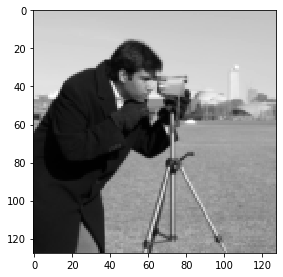

In [5]:
# Load, resize and take a look of the image we are working with

from deblurringUtils import *
from skimage import data

n = 128
camera = data.camera()
smallcamera = resize(camera, [n, n])
camdata = img_as_float(smallcamera)
visualize(camdata)

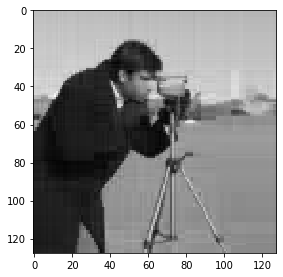

In [6]:
# Verify that the Haar basis does allow an almost sparse representation of the image

H = vectorized2DHaarMatrix(n, n) # the Haar matrix, an orthonormal basis
haarcoeffs = H.T @ vectorize(camdata) # convert to the Haar basis

p = 90 # what percentage of the coefficients to set to zero
thres = np.percentile(np.abs(haarcoeffs), p) 
haarcoeffs[abs(haarcoeffs) <= thres] = 0 # set most entries to zero

# reconstruct the image from the sparse representation
reconstim = unvectorize(H @ haarcoeffs, n, n)
visualize(reconstim)

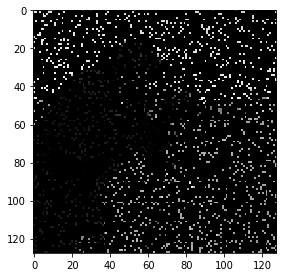

In [7]:
#Verify that a similarly sparse representation in the original pixel space is much worse.

import numpy.random as random

# mask the same percentage of pixels, randomly
mask = np.ones(n**2)
mask[:int(p/100*n**2)] = 0
mask = unvectorize(random.permutation(mask), n, n)
visualize(camdata * mask)

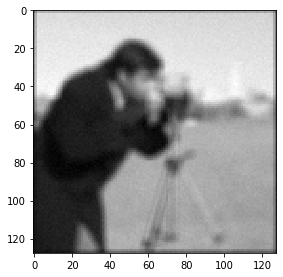

In [8]:
# Create the blurred, corrupted image. Corrupt using i.i.d. N(0,1×10−4) Gausian noise.
 
B = vectorized2DBlurMatrix(n, n, 5);
std = 1e-2
corruption = std * random.randn(n**2)
b = B @ vectorize(smallcamera) + corruption
blurredcam = unvectorize(b, n, n)
visualize(blurredcam)

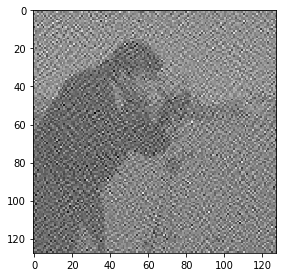

In [9]:
# Compute and visualize the naive solution xLS.

from scipy.sparse.linalg import gmres
from scipy.sparse import csr_matrix

# solving with sparse matrices is faster
sB = csr_matrix(B)
linres, _ = gmres(sB, b, maxiter=50)
visualize(unvectorize(linres, n, n))

*** Define the matrix A to be used in the LASSO problem, and compute the β-smoothness parameter of the smooth part of the LASSO objective, $β = \|A^T A\|_2$. Set the constant stepsizes to α = 1/β for both methods.

In [10]:
from scipy.sparse.linalg import svds
A = B @ H
_, topsv, _ = svds(A, k=1) 
alphaSubgrad = 1/topsv**2

print('alphaSubgrad:', alphaSubgrad)

alphaSubgrad: [1.00235522]


*** Set λ = 2 × 10−4 as the regularization parameter and use 1000 steps of the subgradient solver to recover the image. Visualize the recovered image. What is the final objective value?

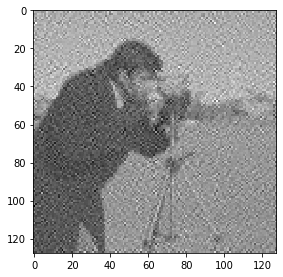

Final objective value:  0.7626463924269523


In [28]:
# subgradient
# set the parameters
lambda_reg = 2e-4
T = 1000
z_0 = np.random.rand(16384)

# use subgradLasso function to recover the image
z_t_subgrad, objhist_subgrad = subgradLasso(A, b, lambda_reg, z_0, alphaSubgrad, T)

# visualize the recovered image
recovered_image = H @ z_t_subgrad
recovered_image = unvectorize(recovered_image, n, n)
visualize(recovered_image)

# print final objective value
print('Final objective value: ', objhist_subgrad[T])

*** Using the same value of λ, use 1000 steps of ISTA to recover the image. Visualize the recovered image. What is the final objective value?

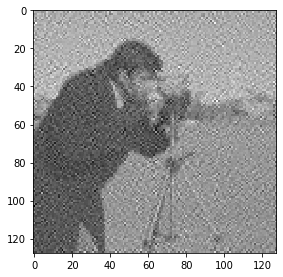

Final objective value:  0.7625766069699427


In [29]:
# ISTA
# use istaLasso function to recover the image
z_t_ista, objhist_ista = istaLasso(A, b, lambda_reg, z_0, alphaSubgrad, T)

# visualize the recovered image
recovered_image = H @ z_t_subgrad
recovered_image = unvectorize(recovered_image, n, n)
visualize(recovered_image)

# print final objective value
print('Final objective value: ', objhist_ista[T])

**** Plot the objective values of ISTA and the subgradient solvers on a log-scale. What conclusions do you draw about the relative merits of the two approaches to solving the LASSO problem? What are the advantages and disadvantages of solving the LASSO problem vs the least squares problem?

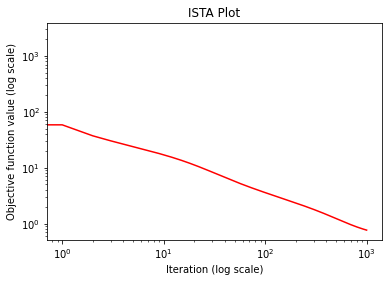

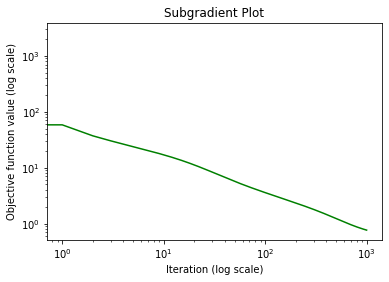

In [37]:
import matplotlib.pyplot as plt

# Generate iteration numbers
x = np.arange(0, 1001)

# Plot objective values of ISTA
fig, ax = plt.subplots()
ax.plot(x, objhist_ista, color="r")
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels and title
ax.set_xlabel('Iteration (log scale)')
ax.set_ylabel('Objective function value (log scale)')
ax.set_title('ISTA Plot')


# Plot objective values of subgradient
fig, ax = plt.subplots()
ax.plot(x, objhist_subgrad, color="g")
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels and title
ax.set_xlabel('Iteration (log scale)')
ax.set_ylabel('Objective function value (log scale)')
ax.set_title('Subgradient Plot')

plt.show()

From the above two plots of objective values of ISTA and subgradient methods, we can see that they are quite similiar although there is a little bit difference in the final objective values where the value for ISTA is 0.76257 and the value of subgradient is 0.76264. However, in both cases they are able to find the minimum onjective value. 

*** We plotted the LASSO objective to verify visually that the methods seem to be con- verging. Comment on the meaningfulness of that value in measuring the quality of the recovered solution. Can you think of a more meaningful metric to report the quality of the iterates? (You may not use knowledge of the true image to compute that metric)

**Answer**: 

# Problem 6

## Problem 6(a)

If $\mathbf{x^*}$ is a solution to $argmin_{\mathbf{x}} f(\mathbf{x})+  λ\|\mathbf{x}\|_1$, from Fermat’s optimality condition we know,

$0 \in ∇ f(\mathbf{x^*}) + λsign(\mathbf{x^*})$ which we can write as,

$ ∇ f(\mathbf{x^*}) + λsign(\mathbf{x^*}) = 0$

==> $ ∇ f(\mathbf{x^*}) = -λsign(\mathbf{x^*})$

==> $ \|∇ f(\mathbf{x^*})\|_2^2 = λ^2\|sign(\mathbf{x^*})\|_2^2 \hspace{1in} $(by sqaring 2-norm in both sides)

==> $ C^2 > λ^2\|sign(\mathbf{x^*})\|_2^2 \hspace{1in}$    (as $\|∇ f(\mathbf{x^*})\|_2 < C$)

==> $ C^2 > λ^2 n \hspace{1in}$ (where $n$ is the number of non-zero entries in $\mathbf{x^*}$)

==> $ n <  \frac{C^2}{λ^2}$

Now from the above derivation of number of non-zerp entries in $\mathbf{x^*}$, we can see that by increasing $λ$ while using $l1$ regularization, number of non-zero entries in $\mathbf{x^*}$ will be decreased proportionally which ensures that $\mathbf{x^*}$ is increasingly sparse.

## Problem 6(b)

Here, $\mathbf{x} = \sum_{i=1}^d x_i$

Now, we know the face that,

$x_1^2 + x_2^2 + ......... + x_d^2 <= (|x_1| + |x_2| + ......... + |x_d|)^2$

Which means,

$ \sum_{i=1}^d x_i^2 <=  (\sum_{i=1}^d |x_i|)^2$ 

==> $ (\sum_{i=1}^d x_i^2)^{1/2} <=  (\sum_{i=1}^d |x_i|) \hspace{1in}$ (taking root on both side)

that implies $ \|\mathbf{x}\|_2 <= \|\mathbf{x}\|_1$

## Problem 6(c)

The solution to the LASSO problem is,

$\mathbf{x}^* = argmin_{x \in R^d}\frac{1}{2} \|\mathbf{Ax} - b\|_2^2 + λ\|\mathbf{x}\|_1$

And the solution to the OLS problem is,

$\mathbf{x}^* = argmin_{x \in R^d}\frac{1}{n} \|\mathbf{Ax} - b\|_2^2 $

Now considering this particular problem, we can think $n$ as constant in OLS solution and can set to 2 that will eventually not impact the solution too much. If we do so, we can easily see that the difference between these two solutions is only the second part where for OLS we can consider the value of $λ$ is 0.

Now if we see what's the role of regularization parameter λ in LASSO, we get that it actually controls the trade-off between the fit to the training data and the complexity of the model. It also encourages the coefficients of some features to be set to zero. A larger value of λ results in a more heavily regularized model, where more coefficients are forced to zero. Even using large enough finite values of the λ ensures that the solution to (LASSO) is exactly 0 that the problem 6 mentioned at the very beginning. 

That actually ensures that using non-zero λ in LASSO actually minimizes the solution by forely setting some of the coefficients to zero that implies that,

$\|\mathbf{x^*}\|_1 <= \|\mathbf{x_{OLS}}\|_1$


Now we know that,

$\|\mathbf{A^T}(\mathbf{Ax^*} - \mathbf{b})\|_2 <= \|\mathbf{A^TAx^*}\|_2 + \|\mathbf{A^Tb}\|_2$

==> $\|\mathbf{A^T}(\mathbf{Ax^*} - \mathbf{b})\|_2 <= \|\mathbf{A^TA}\|_2 \|\mathbf{x^*}\|_2 + \|\mathbf{A^Tb}\|_2$

==> $\|\mathbf{A^T}(\mathbf{Ax^*} - \mathbf{b})\|_2 <= \|\mathbf{A^TA}\|_2 \|\mathbf{x^*}\|_1 + \|\mathbf{A^Tb}\|_2 \hspace{1in}$ (from 6(b))

==> $\|\mathbf{A^T}(\mathbf{Ax^*} - \mathbf{b})\|_2 <= \|\mathbf{A^TA}\|_2 \|\mathbf{x_{OLS}}\|_1 + \|\mathbf{A^Tb}\|_2 \hspace{1in}$ (from the above equation we just derived)




## Problem 6(d)

From 6(a) we found the number of non-zero entries in the LASSO solution, 

$ n <  \frac{C^2}{λ^2}$

Now if we set λ = C in the above equation we get,

$ n <  \frac{C^2}{C^2}$

==> $ n <  1$

That means number of non-zero entries in the LASSO solution is zero in this case that ensures the solution is exactly zero. So $λ_0 = C$ in this case.